Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Grid Search complete.
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


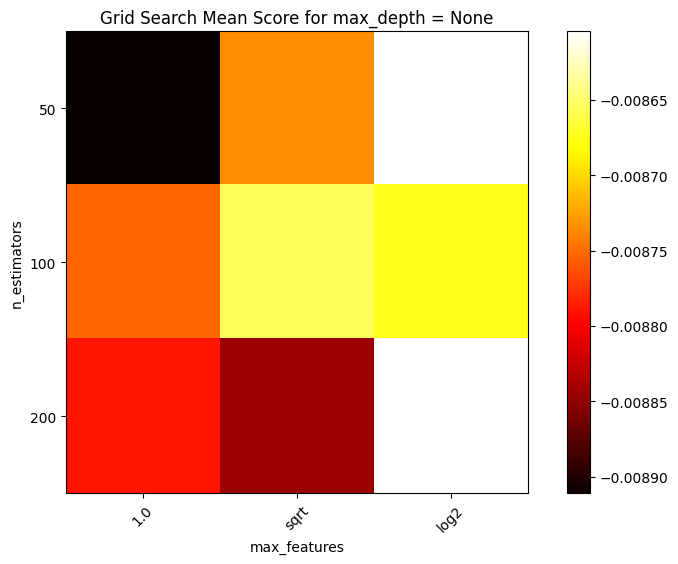

Grid Search plot saved to: E:\A files\Master\Dissertation\ML\randomforest\grid_search_plots\GridSearch_max_depth_None.jpg


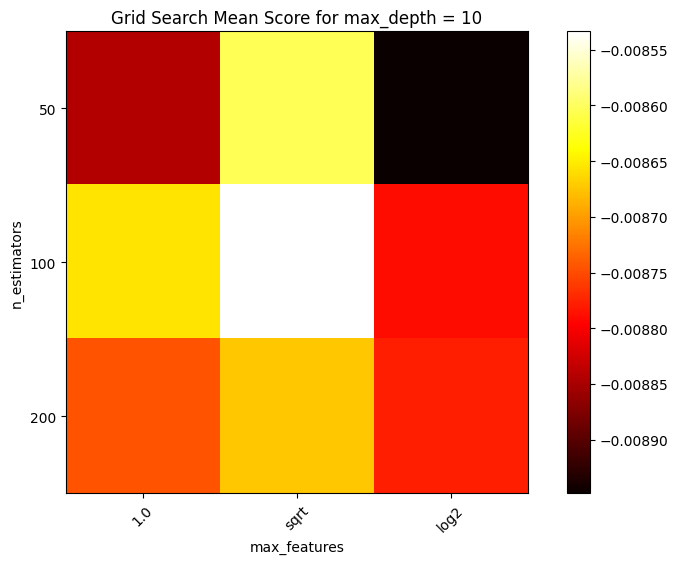

Grid Search plot saved to: E:\A files\Master\Dissertation\ML\randomforest\grid_search_plots\GridSearch_max_depth_10.jpg


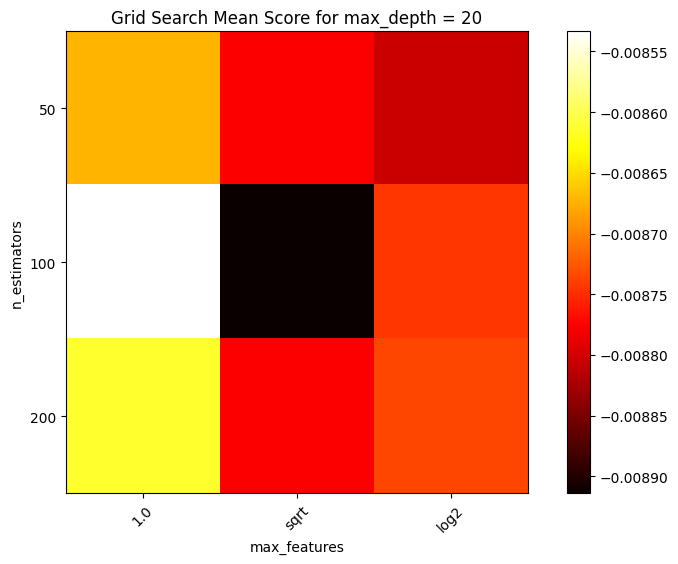

Grid Search plot saved to: E:\A files\Master\Dissertation\ML\randomforest\grid_search_plots\GridSearch_max_depth_20.jpg


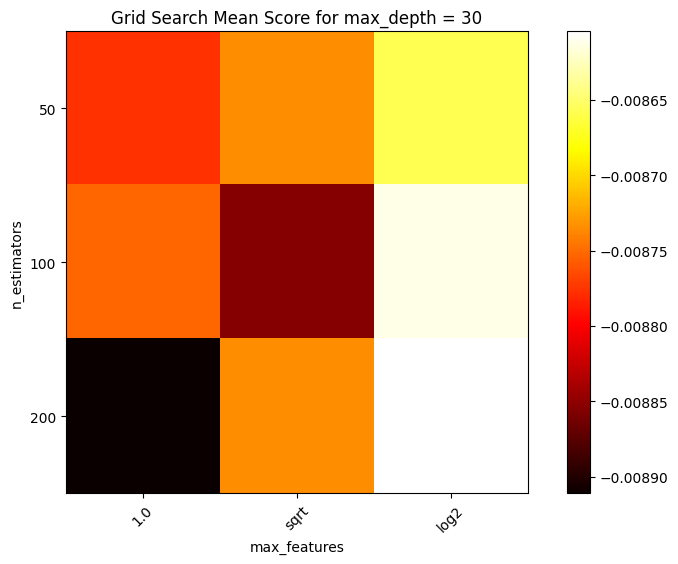

Grid Search plot saved to: E:\A files\Master\Dissertation\ML\randomforest\grid_search_plots\GridSearch_max_depth_30.jpg
Model saved to: E:\A files\Master\Dissertation\ML\randomforest\RF_best.pkl
Cross-validation score: [-0.00865065 -0.01011142 -0.00775878 -0.00809162 -0.00805534]
Mean Squared Error for PA: 0.01


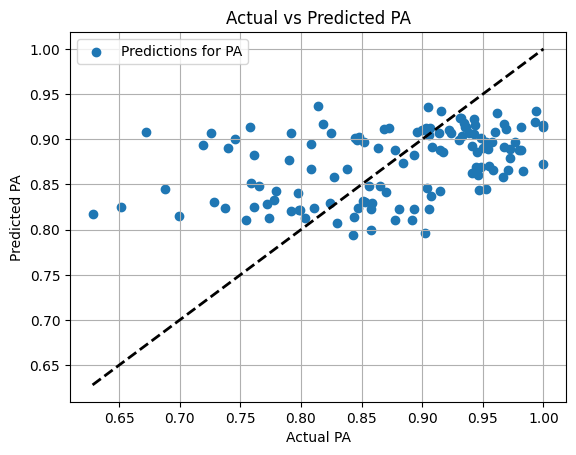

Performance plot saved to: E:\A files\Master\Dissertation\ML\randomforest\performance_plots\Performance_PA.jpg
Mean Squared Error for IoU: 0.02


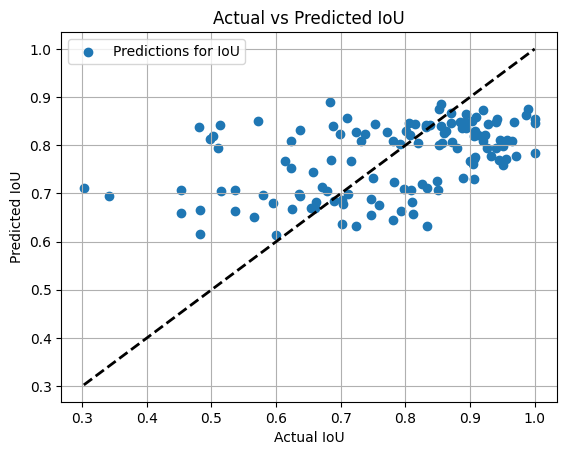

Performance plot saved to: E:\A files\Master\Dissertation\ML\randomforest\performance_plots\Performance_IoU.jpg
Mean Squared Error for DSC: 0.01


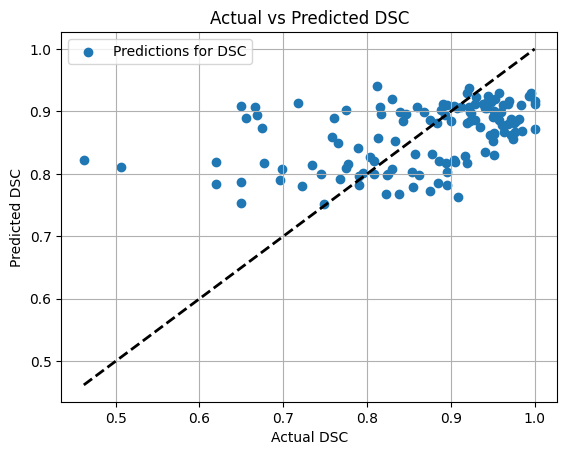

Performance plot saved to: E:\A files\Master\Dissertation\ML\randomforest\performance_plots\Performance_DSC.jpg
Mean Squared Error for MSE: 0.01


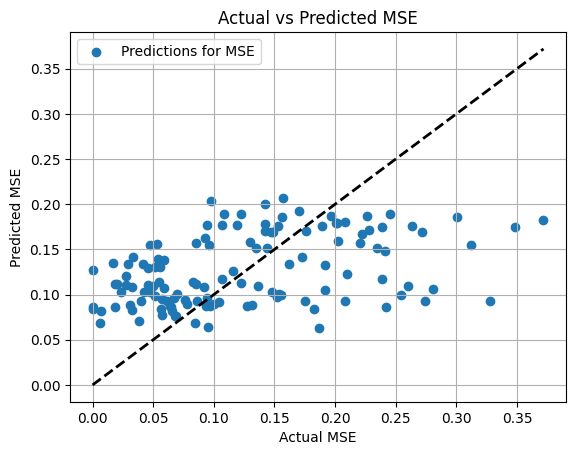

Performance plot saved to: E:\A files\Master\Dissertation\ML\randomforest\performance_plots\Performance_MSE.jpg
Mean Squared Error for NHD: 0.00


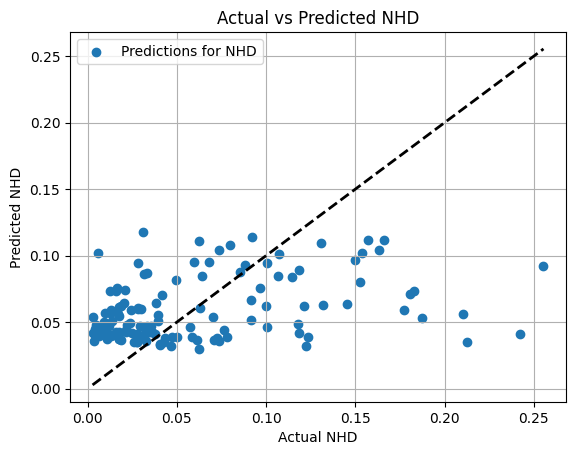

Performance plot saved to: E:\A files\Master\Dissertation\ML\randomforest\performance_plots\Performance_NHD.jpg


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib
import os

# Create directories for saving plots if they don't exist
grid_search_save_path = r"E:\A files\Master\Dissertation\ML\randomforest\grid_search_plots"
performance_save_path = r"E:\A files\Master\Dissertation\ML\randomforest\performance_plots"

os.makedirs(grid_search_save_path, exist_ok=True)
os.makedirs(performance_save_path, exist_ok=True)

# Load data
data_path = r"E:\A files\Master\Dissertation\ML\dataset.csv"
data = pd.read_csv(data_path)

# Splitting the data into features (X) and targets (y)
X = data.drop(columns=['sample', 'PA', 'IoU', 'DSC', 'MSE', 'NHD'])
y = data[['PA', 'IoU', 'DSC', 'MSE', 'NHD']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
}

# Start Grid Search
print("Starting Grid Search...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print("Grid Search complete.")

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Plot Grid Search results
cv_results = grid_search.cv_results_
scores_matrix = cv_results['mean_test_score'].reshape(len(param_grid['n_estimators']),
                                                      len(param_grid['max_features']),
                                                      len(param_grid['max_depth']))

# Plotting for each 'max_depth'
for depth_idx, depth_val in enumerate(param_grid['max_depth']):
    plt.figure(figsize=(10, 6))
    plt.imshow(scores_matrix[:, :, depth_idx], interpolation='nearest', cmap=plt.cm.hot)
    plt.xlabel('max_features')
    plt.ylabel('n_estimators')
    plt.colorbar()
    plt.xticks(np.arange(len(param_grid['max_features'])), param_grid['max_features'], rotation=45)
    plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
    plt.title(f"Grid Search Mean Score for max_depth = {depth_val}")

    # Save the plot with a specific name based on its content
    plot_save_path = f"{grid_search_save_path}\\GridSearch_max_depth_{depth_val}.jpg"
    plt.savefig(plot_save_path, format='jpg')
    plt.show()
    print(f"Grid Search plot saved to: {plot_save_path}")

# Train the model using best parameters
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Save the trained model
model_save_path = r"E:\A files\Master\Dissertation\ML\randomforest\RF_best.pkl"
joblib.dump(best_model, model_save_path)
print(f"Model saved to: {model_save_path}")

# Cross-validation score
cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation score: {cv_score}")

# Predict on the test set
y_pred = best_model.predict(X_test)

# Output names
outputs = ['PA', 'IoU', 'DSC', 'MSE', 'NHD']

# Calculate and print the Mean Squared Error for each output
for i, output in enumerate(outputs):
    mse = mean_squared_error(y_test[output], y_pred[:, i])
    print(f"Mean Squared Error for {output}: {mse:.2f}")

    # Visualization
    plt.scatter(y_test[output], y_pred[:, i], label=f'Predictions for {output}')
    plt.plot([y_test[output].min(), y_test[output].max()], [y_test[output].min(), y_test[output].max()], 'k--', lw=2)
    plt.xlabel(f'Actual {output}')
    plt.ylabel(f'Predicted {output}')
    plt.title(f'Actual vs Predicted {output}')
    plt.legend()
    plt.grid(True)

    # Save the plot with a specific name based on the output
    plot_save_path = f"{performance_save_path}\\Performance_{output}.jpg"
    plt.savefig(plot_save_path, format='jpg')
    plt.show()
    print(f"Performance plot saved to: {plot_save_path}")